In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from data_analysis_codes import param
from data_analysis_codes.tools import Cstyle
from data_analysis_codes.tools import LinData
from data_analysis_codes.tools import GetVars_Plot2d as GVar
from data_analysis_codes.tools import Ricci_CoGrad_Weyl as RCW_file
plt.style.use(Cstyle.style1)

In [2]:
p = param.pflrw_d3e2_L1821_t1_N32_LCDM()
path = '/home/robynm/simulations/pflrw_d3e2_L1821_t1_N32_LCDM/'
OGpath = '/home/robynm/simulations/pflrw_d3e2_L1821_t1_N32_LCDM/output-0000/pflrw_L1821/'
Lin = LinData.LinData_Class(p, path)
get_var = GVar.Get_var(Lin, OGpath)
RCW = RCW_file.Ricci_CoGrad_Weyl_Class(p.dx)

 read time file


In [3]:
it = 8000

In [4]:
Lin.temp_from_temp('an','it', it)

42.22871356649864

In [5]:
f = h5py.File(OGpath+'all_iterations/'+p.sim_name+'_it_{:06d}.hdf5'.format(it), 'r')
curv_dic   = get_var.get_the_curv(f, it)
metric_dic = curv_dic['metric_dic']
ricci_dic  = get_var.get_the_ricci(f, it)
rho        = get_var.get_the_rho(f, it)['rho']
Tdown4 = np.zeros([4,4,Lin.N,Lin.N,Lin.N])
Tdown4[0,0] = rho
    
EdownSR, EupSR, E2SR, EtraceSR = RCW.Weyl_E(metric_dic['gdown'], metric_dic['gup'], ricci_dic['RicciS'], ricci_dic['RicciTdown'],
                              curv_dic['Kdown'], Lin.kappa, rho, Lin.Lambda, Tdown4[1:,1:])
    
BdownSR, B2SR, BtraceSR = RCW.Weyl_B(Lin.LeviCivita(metric_dic['gdown']), metric_dic['gdown'], metric_dic['gup'],
                                ricci_dic['Christoffeludd'], curv_dic['Kdown'], Lin.kappa, Tdown4)
    
HamSR = ricci_dic['RicciS'] + (2/3)*curv_dic['K']**2 - 2*curv_dic['A2'] - 2*Lin.kappa*rho - 2*Lin.Lambda

In [8]:
f = h5py.File(OGpath+'EBWeyl/it={:06d}.hdf5'.format(it), 'r')
Etrace = np.array(f['Etrace'])
Btrace = np.array(f['Btrace'])
E2 = np.array(f['E2'])
B2 = np.array(f['B2'])
#EtraceS = np.array(f['Etrace_S'])
#BtraceS = np.array(f['Btrace_S'])
#E2S = np.array(f['E2_S'])
#B2S = np.array(f['B2_S'])
R = np.array(f['RiemannTdown4'])

In [ ]:
i = 16
plt.figure(figsize=(20,10))

plt.subplot(231)
plt.imshow(E2S[:,:,i])
plt.title(r'$E^2$')
plt.colorbar()

plt.subplot(232)
plt.imshow(B2S[:,:,i])
plt.title(r'$B^2$')
plt.colorbar()

plt.subplot(234)
plt.imshow(EtraceS[:,:,i])
plt.title(r'$E^T$')
plt.colorbar()

plt.subplot(235)
plt.imshow(BtraceS[:,:,i])
plt.title(r'$B^T$')
plt.colorbar()

plt.subplot(236)
plt.imshow(HamSR[:,:,i])
plt.title(r'$Ham$')
plt.colorbar()

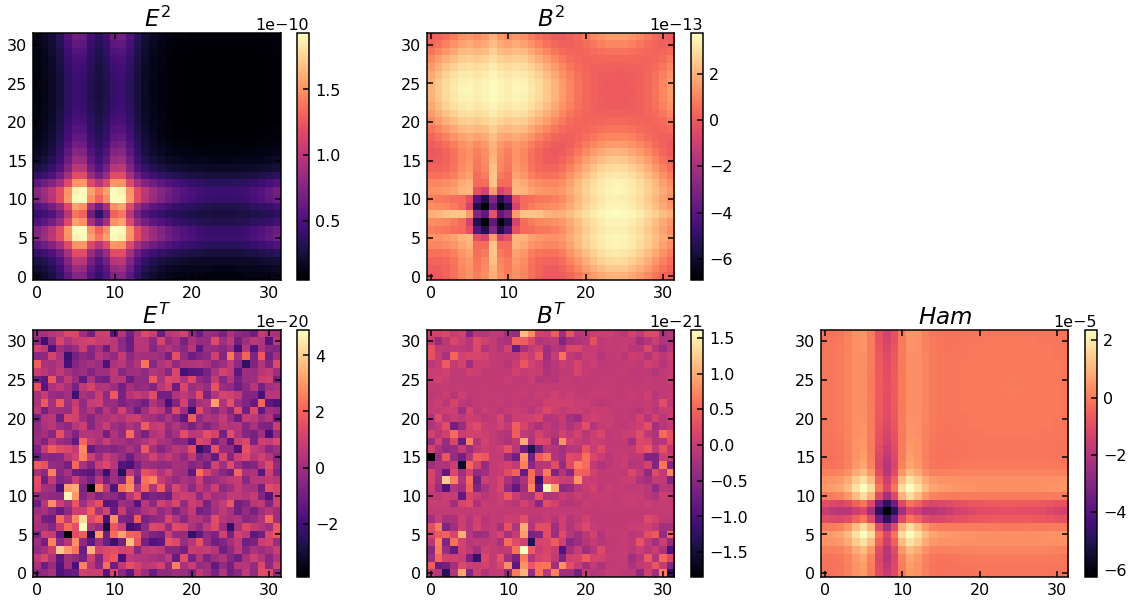

In [9]:
i = 16
plt.figure(figsize=(20,10))

plt.subplot(231)
plt.imshow(E2SR[:,:,i])
plt.title(r'$E^2$')
plt.colorbar()

plt.subplot(232)
plt.imshow(B2SR[:,:,i])
plt.title(r'$B^2$')
plt.colorbar()

plt.subplot(234)
plt.imshow(EtraceSR[:,:,i])
plt.title(r'$E^T$')
plt.colorbar()

plt.subplot(235)
plt.imshow(BtraceSR[:,:,i])
plt.title(r'$B^T$')
plt.colorbar()

plt.subplot(236)
plt.imshow(HamSR[:,:,i])
plt.title(r'$Ham$')
plt.colorbar()

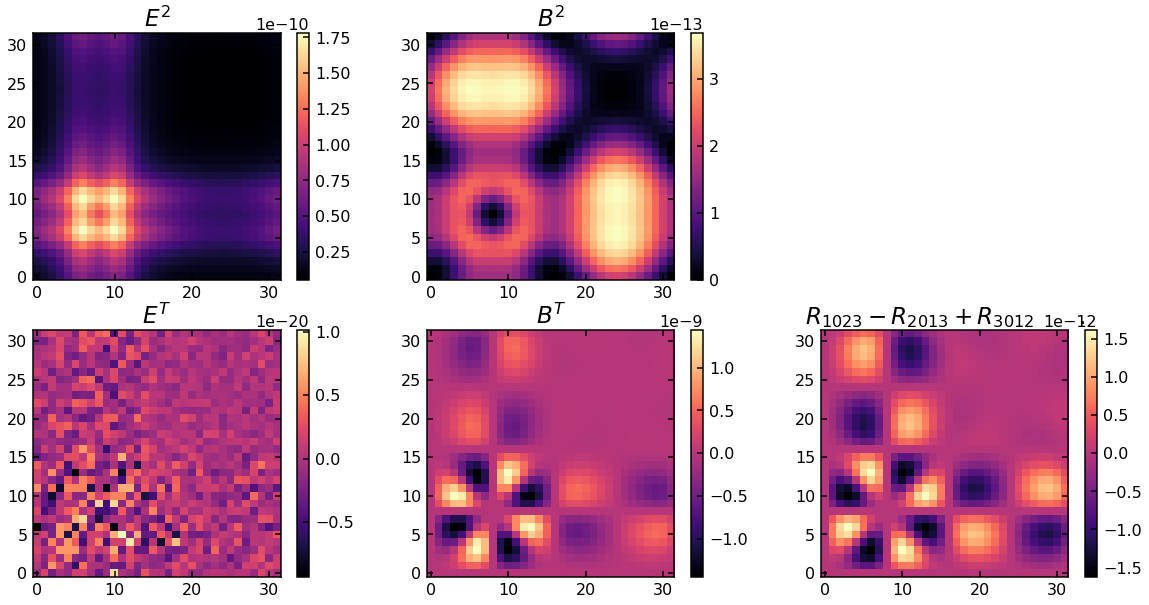

In [10]:
i = 16
plt.figure(figsize=(20,10))

plt.subplot(231)
plt.imshow(E2[:,:,i])
plt.title(r'$E^2$')
plt.colorbar()

plt.subplot(232)
plt.imshow(B2[:,:,i])
plt.title(r'$B^2$')
plt.colorbar()

plt.subplot(234)
plt.imshow(Etrace[:,:,i])
plt.title(r'$E^T$')
plt.colorbar()

plt.subplot(235)
plt.imshow(Btrace[:,:,i])
plt.title(r'$B^T$')
plt.colorbar()

plt.subplot(236)
plt.imshow(R[1,0,2,3,:,:,i]-R[2,0,1,3,:,:,i]+R[3,0,1,2,:,:,i])
plt.title(r'$R_{1023}-R_{2013}+R_{3012}\;\;\;\;\;\;\;.$')
plt.colorbar()

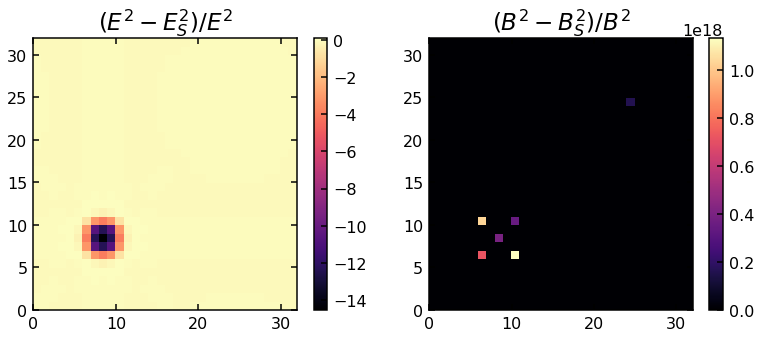

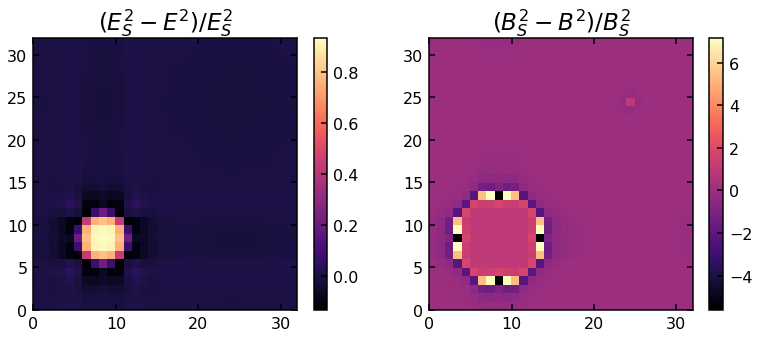

In [9]:
i = 10
plt.figure(figsize=(13,5))
plt.subplot(121)
plt.pcolor((E2[:,:,i]-E2S[:,:,i])/E2[:,:,i])
plt.title(r'$(E^2-E_{S}^2)/E^2$')
plt.colorbar()
plt.subplot(122)
plt.pcolor((B2[:,:,i]-B2S[:,:,i])/B2[:,:,i])
plt.title(r'$(B^2-B_{S}^2)/B^2$')
plt.colorbar()

plt.figure(figsize=(13,5))
plt.subplot(121)
plt.pcolor((E2S[:,:,i]-E2[:,:,i])/E2S[:,:,i])
plt.title(r'$(E_{S}^2-E^2)/E_{S}^2$')
plt.colorbar()
plt.subplot(122)
plt.pcolor((B2S[:,:,i]-B2[:,:,i])/B2S[:,:,i])
plt.title(r'$(B_{S}^2-B^2)/B_{S}^2$')
plt.colorbar()

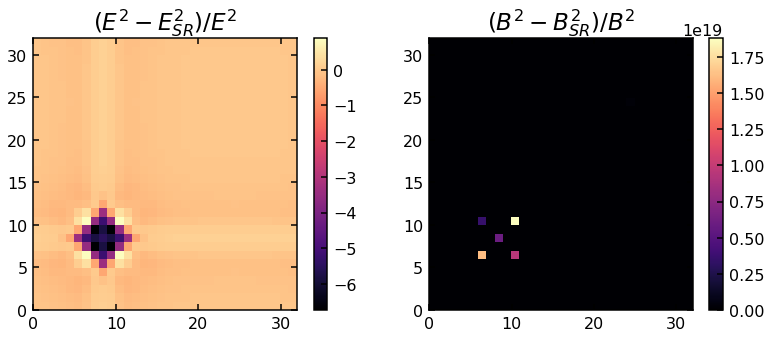

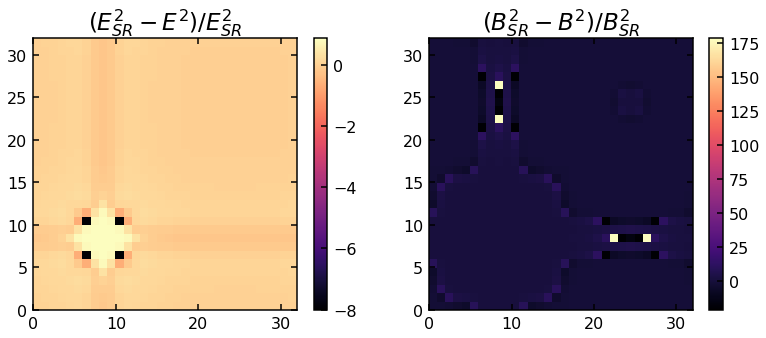

In [11]:
i = 10
plt.figure(figsize=(13,5))
plt.subplot(121)
plt.pcolor((E2[:,:,i]-E2SR[:,:,i])/E2[:,:,i])
plt.title(r'$(E^2-E_{SR}^2)/E^2$')
plt.colorbar()
plt.subplot(122)
plt.pcolor((B2[:,:,i]-B2SR[:,:,i])/B2[:,:,i])
plt.title(r'$(B^2-B_{SR}^2)/B^2$')
plt.colorbar()

plt.figure(figsize=(13,5))
plt.subplot(121)
plt.pcolor((E2SR[:,:,i]-E2[:,:,i])/E2SR[:,:,i])
plt.title(r'$(E_{SR}^2-E^2)/E_{SR}^2$')
plt.colorbar()
plt.subplot(122)
plt.pcolor((B2SR[:,:,i]-B2[:,:,i])/B2SR[:,:,i])
plt.title(r'$(B_{SR}^2-B^2)/B_{SR}^2$')
plt.colorbar()

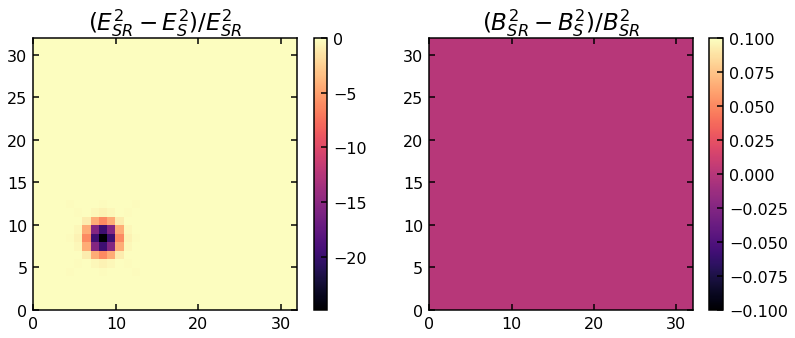

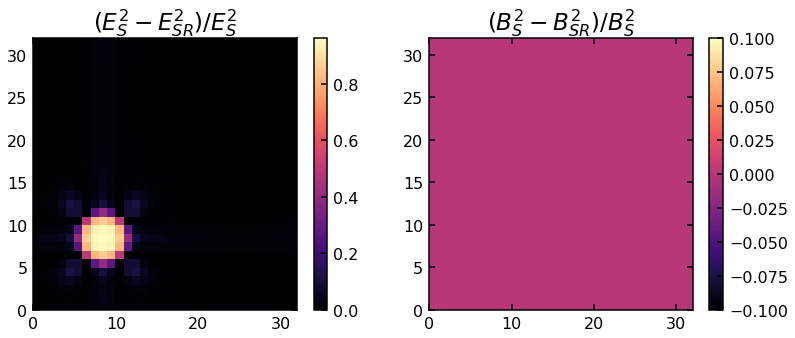

In [10]:
i = 10
j = 16
plt.figure(figsize=(13,5))
plt.subplot(121)
plt.pcolor((E2SR[:,:,i]-E2S[:,:,i])/E2SR[:,:,i])
plt.title(r'$(E_{SR}^2-E_{S}^2)/E_{SR}^2$')
plt.colorbar()
plt.subplot(122)
plt.pcolor((B2SR[:,:,i]-B2S[:,:,i])/B2SR[:,:,i])
plt.title(r'$(B_{SR}^2-B_{S}^2)/B_{SR}^2$')
plt.colorbar()

plt.figure(figsize=(13,5))
plt.subplot(121)
plt.pcolor((E2S[:,:,i]-E2SR[:,:,i])/E2S[:,:,i])
plt.title(r'$(E_{S}^2-E_{SR}^2)/E_{S}^2$')
plt.colorbar()
plt.subplot(122)
plt.pcolor((B2S[:,:,i]-B2SR[:,:,i])/B2S[:,:,i])
plt.title(r'$(B_{S}^2-B_{SR}^2)/B_{S}^2$')
plt.colorbar()

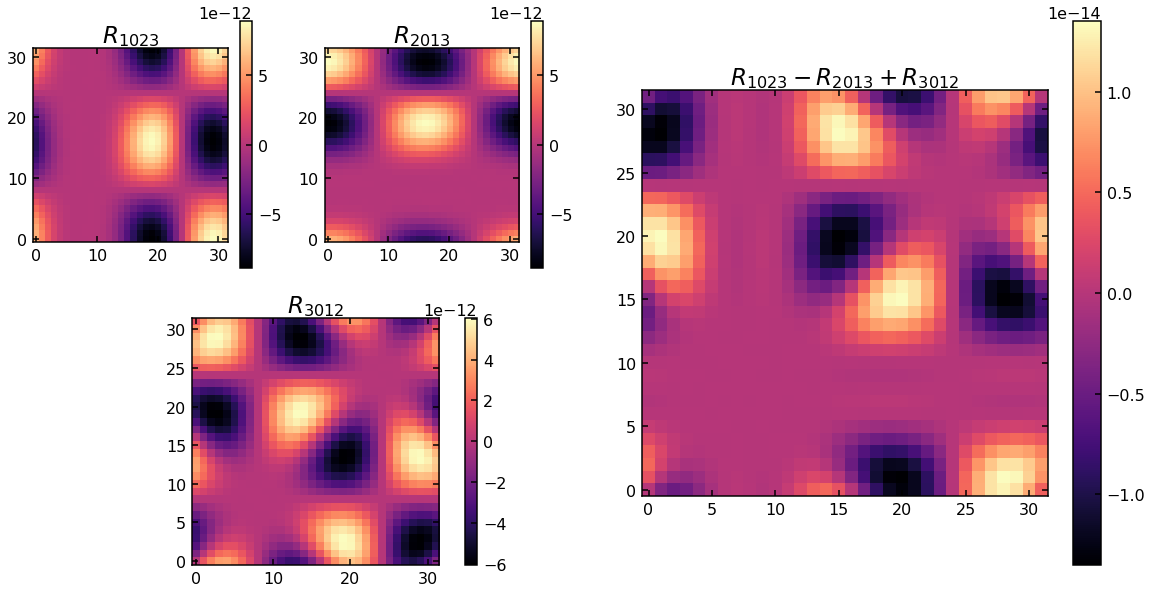

In [14]:
i = 10
plt.figure(figsize=(20,10))

plt.subplot(241)
plt.imshow(R[1,0,2,3,:,:,i])
plt.title(r'$R_{1023}$')
plt.colorbar()

plt.subplot(242)
plt.imshow(R[2,0,1,3,:,:,i])
plt.title(r'$R_{2013}$')
plt.colorbar()

plt.subplot(223)
plt.imshow(R[3,0,1,2,:,:,i])
plt.title(r'$R_{3012}$')
plt.colorbar()

plt.subplot(122)
plt.imshow(R[1,0,2,3,:,:,i]-R[2,0,1,3,:,:,i]+R[3,0,1,2,:,:,i])
plt.title(r'$R_{1023}-R_{2013}+R_{3012}$')
plt.colorbar()